<a href="https://colab.research.google.com/github/AikyaKumar/AikyaKumar/blob/main/Exercise_8_Data_Analytics_Exercise_Six.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#import statments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
#uploading the dataset
df = pd.read_csv('/content/heart.csv', sep=';')
df.head(10)

,"age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target"
0,"63,1,3,145,233,1,0,150,0,2.3,0,0,1,1"
1,"37,1,2,130,250,0,1,187,0,3.5,0,0,2,1"
2,"41,0,1,130,204,0,0,172,0,1.4,2,0,2,1"
3,"56,1,1,120,236,0,1,178,0,0.8,2,0,2,1"
4,"57,0,0,120,354,0,1,163,1,0.6,2,0,2,1"
5,"57,1,0,140,192,0,1,148,0,0.4,1,0,1,1"
6,"56,0,1,140,294,0,0,153,0,1.3,1,0,2,1"
7,"44,1,1,120,263,0,1,173,0,0,2,0,3,1"
8,"52,1,2,172,199,1,1,162,0,0.5,2,0,3,1"
9,"57,1,2,150,168,0,1,174,0,1.6,2,0,2,1"


Decision Tree Classifier Results
Accuracy: 0.9
Precision: 0.9411764705882353
Recall: 0.8421052631578947
F1 Score: 0.8888888888888888
Random Forest Classifier Results
Accuracy: 0.875
Precision: 0.8888888888888888
Recall: 0.8421052631578947
F1 Score: 0.8648648648648649

Gradient Boosted Trees Classifier Results
Accuracy: 0.9
Precision: 0.9411764705882353
Recall: 0.8421052631578947
F1 Score: 0.8888888888888888


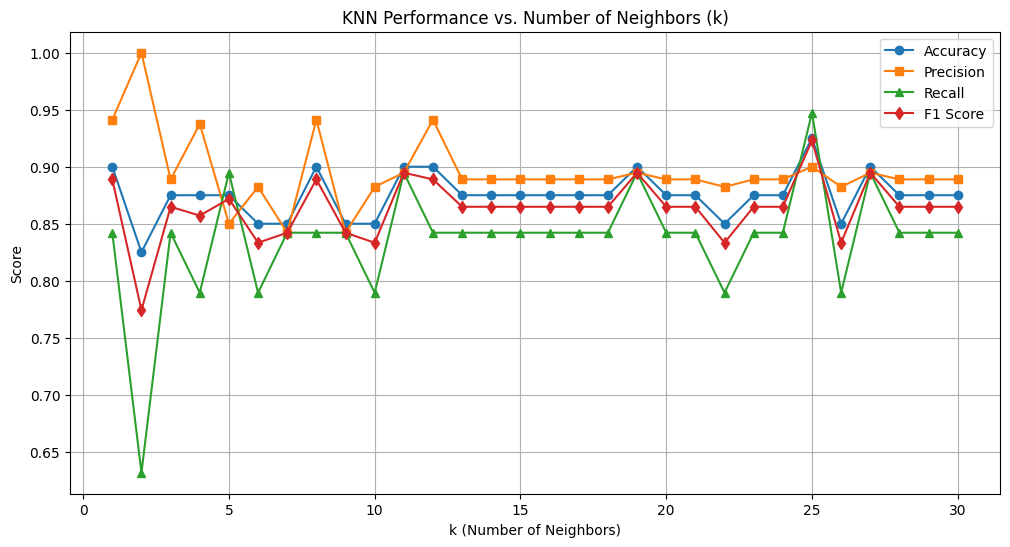

Optimal k value: 25
Decision Tree - Average Accuracy: 0.83
Random Forest - Average Accuracy: 0.86
KNN - Average Accuracy: 0.86


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Creating a synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=200, n_features=4, n_classes=2, random_state=42)

# Split data into training and testing sets (Holdout method)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_tree = tree_clf.predict(X_test)

# Evaluation Metrics
print("Decision Tree Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

# Initialize and train the Gradient Boosted Trees Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predictions and Evaluation for Gradient Boosted Trees
y_pred_gb = gb_clf.predict(X_test)

# Evaluation Metrics for Gradient Boosted Trees
print("\nGradient Boosted Trees Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))

# Range of k values to test
k_values = range(1, 31)

# Store metrics for each k
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop through different k values
for k in k_values:
    # Initialize and train KNN with current k
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)

    # Make predictions
    y_pred_knn = knn_clf.predict(X_test)

    # Calculate and store metrics
    accuracy_scores.append(accuracy_score(y_test, y_pred_knn))
    precision_scores.append(precision_score(y_test, y_pred_knn))
    recall_scores.append(recall_score(y_test, y_pred_knn))
    f1_scores.append(f1_score(y_test, y_pred_knn))

# Plot the results
plt.figure(figsize=(12, 6))

plt.plot(k_values, accuracy_scores, label="Accuracy", marker='o')
plt.plot(k_values, precision_scores, label="Precision", marker='s')
plt.plot(k_values, recall_scores, label="Recall", marker='^')
plt.plot(k_values, f1_scores, label="F1 Score", marker='d')

plt.title("KNN Performance vs. Number of Neighbors (k)")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

# Find optimal k based on accuracy
optimal_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Optimal k value: {optimal_k}")

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
models = {"Decision Tree": tree_clf, "Random Forest": rf_clf, "KNN": knn_clf}

for model_name, model in models.items():
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    print(f"{model_name} - Average Accuracy: {np.mean(accuracy_scores):.2f}")
